# Визуализация: введение в Matplotlib и Seaborn

<div style="text-align: center;">
  <img src="https://miro.medium.com/v2/resize:fit:950/1*BxTr23ZW6brtURoVtuorVQ.png" width="800"/>
</div>

Человеку тяжело дается анализ численных данных, особенно больших. Наш мозг эволюционно лучше заточен под выделение закономерностей из визуальных данных -- лучше один раз посмотреть, чем сто раз сказать. Визуализация данных -- это симбиоз науки и искусства, позволяющий с помощью графиков и визуализаций видеть скрытые закономерности, тренды и структуры, невидимые в численном виде.

Мы познакомимся с двумя базовыми библиотеками для визуализации: **Matplotlib** и **Seaborn**.

*   **Matplotlib:** фундаментальная библиотека. Предоставляет функционал для создания любых графиков, и статичных, и интерактивных, и анимированных.
*   **Seaborn:** построен на основе Matplotlib. Он специализируется на создании эстетичных и информативных графиков со статистикой. Чаще всего, код на Seaborn более компактный и гораздо плавнее управляется с комплексными структурами (вроде датафреймов Pandas).

В этом ноутбуке вы познакомитесь с базовыми способами построения визуализаций с помощью обоих библиотек. Для визуализаций будем использовать искуственно сгенерированные данные.

**Задачи:**

*   Симулировать данные для визуализации с помощью NumPy.
*   Изучить базовую структуру графика Matplotlib (Figure и Axes).
*   Создать наиболее общепринятые графики: диаграмму рассеяния, линейный график, гистограмма, столбчатая диаграмма.
*   Добавить ярлыки, заголовки и легенду к графикам.
*   Использовать Seaborn для создания красивых статистических графиков.
*   Применить техники визуализации данных к искуственным данным.

**Ноутбук предполагает знания основного синтаксиса Python (переменные, типы данных, списки, циклы), массивов NumPy и датафреймов Pandas.**

**Основные термины:**

*   **Изображение (Figure):** окно или страница заданного размера, содержащее ваш график (или графики).
*   **Подграфик (Axes, или Subplot):** отдельная область для построения графика внутри изображения. В одном изображении может быть несколько подграфиков.
*   **Диаграмма рассеяния (Scatter Plot):** показывает связь между двумя численными значениями как точками на плоскости с соответствующими координатами.
*   **Линейный график (Line Plot):** показывает тренд или изменение численного значения относительно другого (зачастую во времени).
*   **Гистограмма (Histogram):** показывает распределение одной численной переменной, разделяя все значения на диапазоны-бины и подсчитывая, сколько значений попадает в каждый диапазон.
*   **Столбчатая диаграмма (Bar Plot):** сравнивает одно численное значения для разных категорий.

**Замечание**
Запустите ячейку ниже по `SHIFT+ENTER` для загрузки и установки нужных пакетов, если вы не уверены, что такие установлены. Если они уже есть, её можно пропустить.

In [ ]:
!pip install numpy pandas seaborn matplotlib

## Симуляция данных

Для демонстрации разных типов графиков, воспользуемся имитацией простейших астрономических данных с помощью NumPy, а также экзопланетным каталогом, использованным в предыдущем ноутбуке. Создадим данные для:

*   Соотношения <<масса - светимость>>;
*   Кривой блеска переменной звезды;
*   Распределения красных смещений галактик
*   Подсчетов объектов разных типов
*   Свойств экзопланет (для примеров Seaborn)

In [2]:
# импортируем необходимые библиотеки
import matplotlib.pyplot as plt # общепринятое сокращения для matplotlib
import seaborn as sns           # для seaborn
import numpy as np
import pandas as pd

# --- Симуляция данных ---
# 1: Соотношение масса-светимость
num_stars = 100
star_masses = np.random.lognormal(mean=-2.5, sigma=0.69, size=num_stars) # взято из начальной функции масс Шабри  
# np.random.РАСПРЕДЕЛЕНИЕ позволяет получить выборку для этого распределения
# примеры распределений: normal, lognormal, gamma
star_luminosities = star_masses**3.5 * np.random.normal(1.0, 0.3, size=num_stars)

# 2: Кривая блеска переменной
num_time_points = 50
time_points = np.arange(num_time_points)
brightness_signal = 5 + 2 * np.sin(time_points / 5 * np.pi) # синусоида. Какой у неё период, если time_points в днях?
brightness_noise = np.random.normal(0, 0.5, size=num_time_points) # неизбежный шум
variable_star_brightness = brightness_signal + brightness_noise

# 3: Распределение галактик по красному смещению
num_galaxies = 500
galaxy_redshifts = np.random.gamma(shape=2.0, scale=0.1, size=num_galaxies)

# 4: Подсчет объектов разных типов
object_types = ['Звезда', 'Галактика', 'Квазар', 'Туманность', 'Скопление']
object_counts = np.array([150, 75, 20, 40, 35])

# 5: Свойства экзопланет
num_exo = 100
# exoplanet_data_dict = {
#     'Planet Name': [f'Exo-{i:03d}' for i in range(num_exo)],
#     'Type': np.random.choice(['Газовый гигант', 'Суперземля', 'Холодный гигант'], size=num_exo),
#     'Orbital_Period_Days': np.random.lognormal(mean=1.5, sigma=1.0, size=num_exo) + 1,
#     'Radius_Earth': np.random.lognormal(mean=0., sigma=0.4, size=num_exo) * 5 + 0.5
# }
#exoplanets_df = pd.DataFrame(exoplanet_data_dict)
#exoplanets_df['Type'] = exoplanets_df['Type'].astype('category')
exoplanets_df = pd.read_csv("open_exoplanet_catalogue.csv")
print(exoplanets_df['list'].unique())
# в list много сложных атрибутов, перечисленных через запятую

# Выделим непересекающиеся атрибуты
unique_types = ['Confirmed planets', 'Controversial', 'Kepler Objects of Interest', 'Retracted planet candidate', 'Solar System']

# создадим новую колонку упрощенных типов, игнорируем двойственность, принадлежность к скоплениям и тд
_types = [] # шаблон под колонку

for i, _string in enumerate(exoplanets_df['list']): #пробежимся по всем ячейкам в столбце list, в i сидит индекс ячейки
    for _type in unique_types:
        if _type in exoplanets_df['list'].iloc[i]: # тут in проверяет вхождение подстроки _type в строку в ячейке
            _types.append(_type) # если таковая есть - записываем в шаблон
            
exoplanets_df['type'] = _types # создаем новую колонку на основе шаблона

print(exoplanets_df['type'].unique())
exoplanets_df.columns

['Controversial' 'Confirmed planets'
 'Confirmed planets, Planets in binary systems, S-type'
 'Controversial, Planets in binary systems, S-type'
 'Confirmed planets, Planets in binary systems, P-type'
 'Controversial, Planets in open clusters'
 'Confirmed planets, Planets in open clusters'
 'Controversial, Planets in binary systems, P-type' 'Solar System'
 'Retracted planet candidate, Planets in binary systems, S-type'
 'Kepler Objects of Interest' 'Confirmed planets, Orphan planets'
 'Retracted planet candidate'
 'Confirmed planets, Planets in open clusters, Planets in binary systems, S-type'
 'Confirmed planets, Planets in binary systems, P-type, Planets in globular clusters'
 'Planets in binary systems, S-type, Confirmed planets']
['Controversial' 'Confirmed planets' 'Solar System'
 'Retracted planet candidate' 'Kepler Objects of Interest']


Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list',
       'type'],
      dtype='object')

## Основы Matplotlib: Изображение и подграфики

В Matplotlib, каждый график находится внутри **изображения (Figure)**. Можно считать изображение холстом, где будут появляться визуализации. Внутри изображения можно создать один или несколько **подграфиков (Axes)**. Именно внутри конкретного подграфика строятся точки, прямые, столбцы и др., вместе с осями x и y, отметками на осях и их подписями.

Самый частый способ начать построение - использовать функцию `plt.subplots()`. Она создает два объекта типа `Figure` и `Axes`, возвращая их:

```python
fig, ax = plt.subplots()
```

Как только у вас есть объект `ax` (подграфик), можно использовать его методы `ax.scatter()`, `ax.plot()`, `ax.hist()`, `ax.bar()` для построения графиков. Аргументами этих методов служат данные для построения.

## Графики в Matplotlib

Создадим, используя симуляции, несколько графиков с помощью методов объекта класса `Axes`.

### Диаграмма рассеяния

**Назначение:** показать графически связь или корреляцию между двумя численными переменными. Каждый элемент данных демонстрируется с помощью маркера-точки (или другого символа)

**Метод:** `ax.scatter(x_values, y_values)`

**Пример 1:** простейшая диаграмма рассеяния на примере соотношения "масса-светимость"

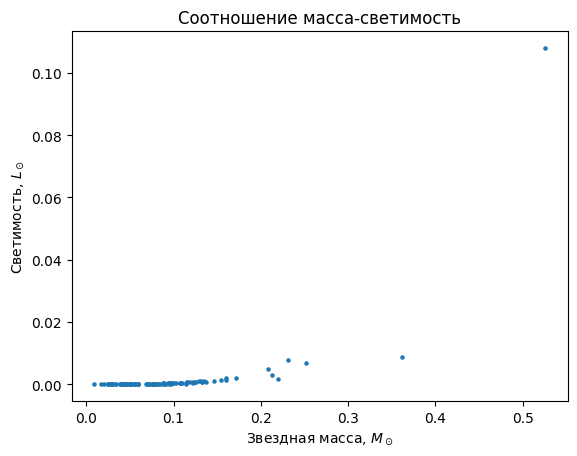

In [2]:
# 1. Создаем изображение и подграфик
fig, ax = plt.subplots()

# 2. Строим диаграмму рассеяния на подграфике ax
ax.scatter(star_masses, star_luminosities, s=5) # именованый аргумент s позволяет задать размер в пикселах

# 3. Добавляем название осей и графика
ax.set_xlabel(r"Звездная масса, $M_\odot$") # можно встроить LaTeX!
ax.set_ylabel(r"Светимость, $L_\odot$")
ax.set_title("Соотношение масса-светимость")

# 4. Вывести график; в случае Jupyter Notebook график выведется даже без этой команды
plt.show()

### Диаграмма рассеяния "период-радиус" для экзопланет

Сделаем диаграмму рассеяния, базируясь на наших данных об экзопланетах. 

**Пример 2:** Диаграмма рассеяния "период экзопланеты - её радиус"

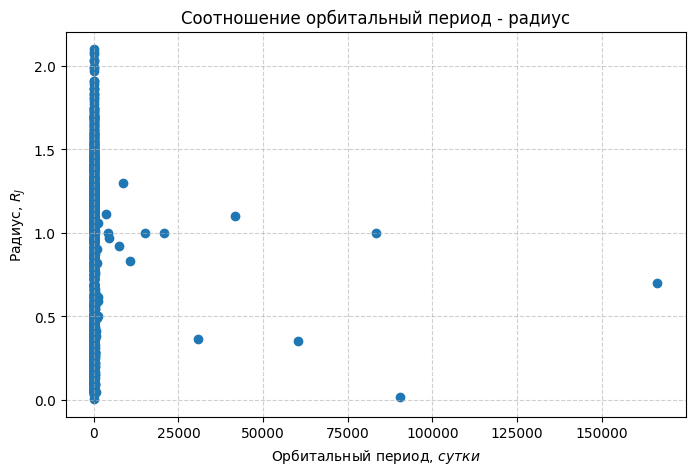

In [12]:
# используем данные из exoplanets_df
periods = exoplanets_df['period'] # в сутках
radii = exoplanets_df['radius'] # в радиусах Юпитера

fig, ax = plt.subplots(figsize=(8, 5)) # Опционально можно задать размер изображения в дюймах для лучшей читаемости

ax.scatter(periods, radii)

ax.set_xlabel(r"Орбитальный период, $\itсутки$")
ax.set_ylabel("Радиус, $R_J$")
ax.set_title("Соотношение орбитальный период - радиус")

# Добавим сетку для лучшей читаемости
ax.grid(True, linestyle='--', alpha=0.6) # linestyle задает тип линии (штрихованный), alpha - прозрачность

plt.show()

## Обычный график (Line plot)

**Предназначение:** показать тренд или изменение численной величины в непрерывном случае, например, в заивисимости от времени.

**Метод:** `ax.plot(x_values, y_values)`

**Пример 3:** График - Симуляция кривой блеска звезды

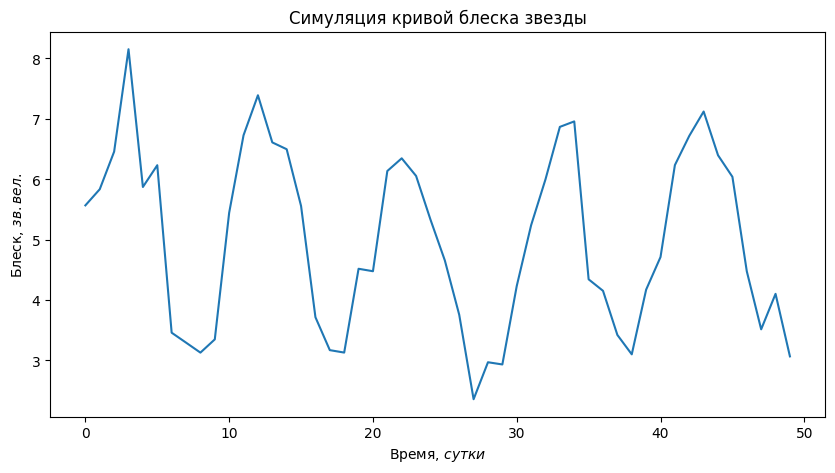

In [16]:
# используем созданные time_points и variable_star_brightness

fig, ax = plt.subplots(figsize=(10, 5)) # сделаем изображение широким для видимости 

ax.plot(time_points, variable_star_brightness)

ax.set_xlabel(r"Время, $\itсутки$")
ax.set_ylabel(r"Блеск, $\itзв. вел.$")
ax.set_title("Симуляция кривой блеска звезды")

plt.show()

### Гистограммы

**Предназначение:** показать распределение одной численной величины. Гистограмма разделяет диапазон данных на ячейки-бины, считает, сколько точек попало в каждый бин, и показывает это количество как высоту соответствующего столбца.

**Метод:** `ax.hist(data, bins=number_of_bins)`

**Пример 4:** Гистограмма - Распределение галактик по красному смещению

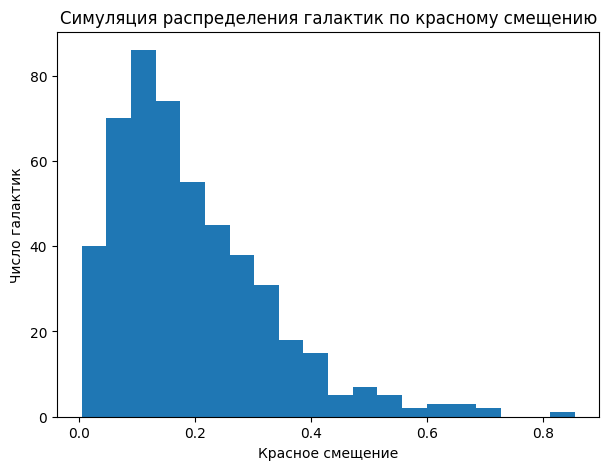

In [13]:
# используем galaxy_redshifts

fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(galaxy_redshifts, bins=20) # делим диапазон данных на 20 бинов, по-умолчанию бинов 10

ax.set_xlabel("Красное смещение")
ax.set_ylabel("Число галактик")
ax.set_title("Симуляция распределения галактик по красному смещению")

plt.show()

## Столбчатые диаграммы

**Предназначение:** сравнение количеств объектов различных категорий. Каждая категория имеет столбец, чья высота равна количеству объектов соответствующей категории. 

**Метод:** `ax.bar(category_labels, category_values)`

**Пример 5:** Столбчатая диаграмма - число объектов разных типов

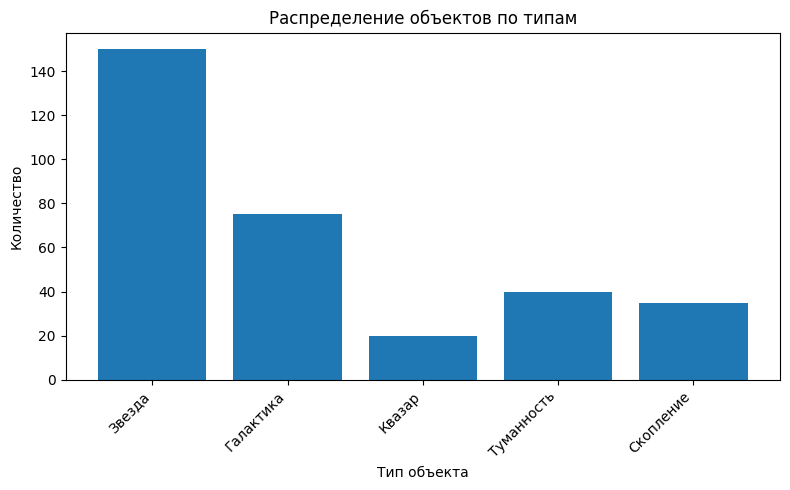

In [20]:
# используем object_types (категории объектов) и object_counts (количество объектов каждой категории)

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(object_types, object_counts)

ax.set_xlabel("Тип объекта")
ax.set_ylabel("Количество")
ax.set_title("Распределение объектов по типам")

# Повернем подписи к числам на оси x, чтобы они не наслаивались друг на друга
plt.xticks(rotation=45, ha='right') # Повернем подписи на 45 градусов, и выровняем текст по горизонтали справа

plt.tight_layout() # автоматически "уплотнить" параметры графика, чтобы было меньше пустот
plt.show()

## Настраиваем графики: подписи, заголовки, легенда и внешний вид

Иногда одной картинки бывает достаточно, иногда - нет. График с неподписанными осями и делениями зачастую вызывает у ученых праведный гнев. Можно избежать такого гнева с помощью встроенных методов объекта `Axes`:

*   Подписи к осям: `ax.set_xlabel("Ось X")`, `ax.set_ylabel("Ось Y")`.
*   Заголовок графика и подграфика: `ax.set_title("Заголовок")` для заголовка подграфика, `fig.suptitle("Общий заголовок")` для заголовка всего изображения (когда подграфиков несколько)
*   Легенда: если добавить опциональный аргумент подписи графика `label='...'` во время вызова методов построения графиков (например как `ax.plot()` или `ax.scatter()`), с помощью метода `ax.legend()` можно вывести эти подписи в специальном окошечке легенды.
*   Изменение внешнего вида графика: аргументы типа `color` (цвет), `linestyle` (тип линии), `marker` (маркер для точки), `s` (размер точек на диаграмме рассеяния), `alpha` (прозрачность), и т. д., могут быть переданы в соответствующие методы построения графиков.

**Пример 6:** Раскрашенный график с легендой

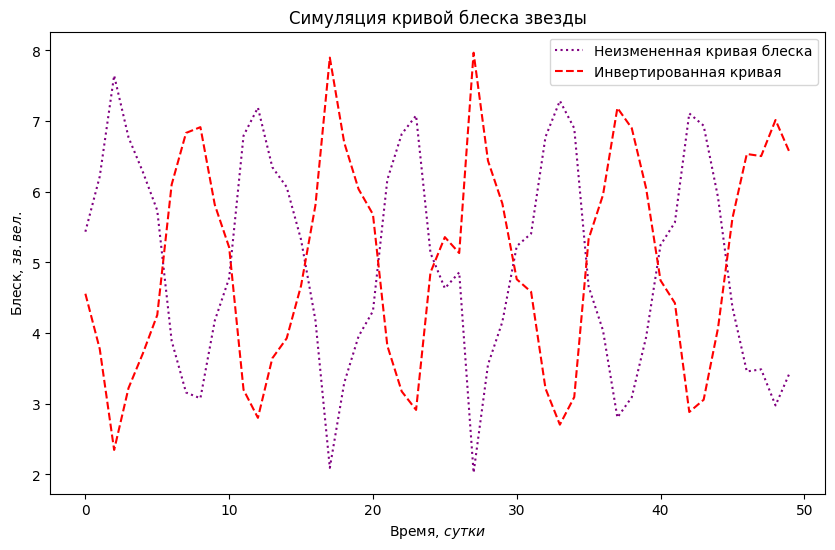

In [25]:
# используем исходные данные time_points и variable_star_brightness

fig, ax = plt.subplots(figsize=(10, 6))

# Построим теперь его фиолетовым, точечным и с подписью в легенду
# в случае одного графика подпись бессмысленна
# логичнее его использовать с несколькими
ax.plot(time_points, variable_star_brightness, color='purple', linestyle=':', label='Неизмененная кривая блеска')
variable_star_brightness_changed = -variable_star_brightness + 2 * np.mean(variable_star_brightness)
ax.plot(time_points, variable_star_brightness_changed,  color='red', linestyle='--', label='Инвертированная кривая')
ax.set_xlabel(r"Время, $\itсутки$")
ax.set_ylabel(r"Блеск, $\itзв. вел.$")
ax.set_title("Симуляция кривой блеска звезды")

# метод для отображения легенды из подписей в ax.plot()
ax.legend()

plt.show()

**Пример 7:** Диаграмма рассеяния с цветовой идентификацией точек

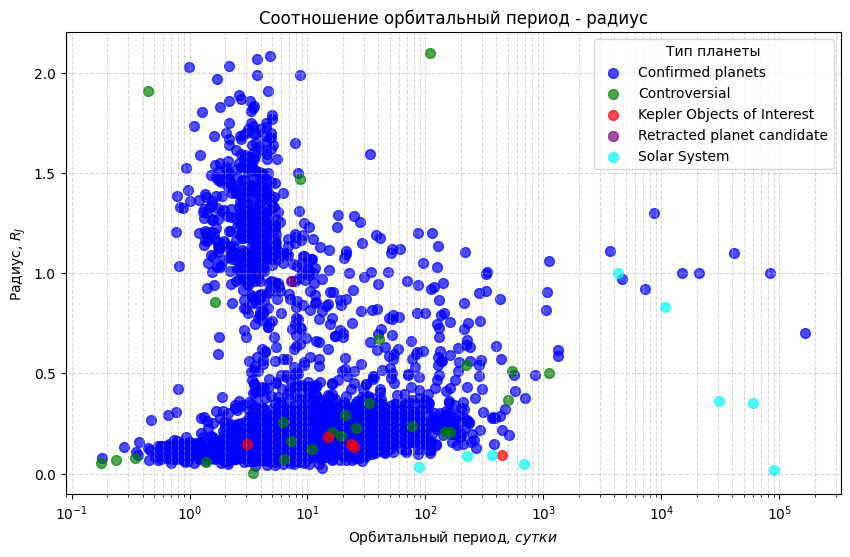

In [44]:
# Используем exoplanets_df. Давайте изобразим разные атрибуты экзопланет, перечисленные в 'list', разными цветами

fig, ax = plt.subplots(figsize=(10, 6)) 

# Определим список цветов (их должно быть столько же, сколько непересекающихся атрибутов!)
colors = ['blue', 'green', 'red', 'purple', 'cyan']

# Через цикл построим разные графики для каждого атрибута
for i, planet_type in enumerate(unique_types):
    # Отфильтруем датафрейм для получения только планет с таким атрибутом
    subset_df = exoplanets_df[exoplanets_df['type'].str.contains(planet_type)]
    # Построим соответствующий график
    ax.scatter(subset_df['period'], subset_df['radius'],
               color=colors[i],          # цвет будем использовать соответствующий типу
               label=planet_type,        # в легенду засунем соответствующий заголовок
               alpha=0.7,                # сделаем точки чуть прозрачными, чтобы лучше видеть пересечение
               s=50)                     # сделаем размер точки большим

# Добавим подписи и заголовки
ax.set_xlabel(r"Орбитальный период, $\itсутки$")
ax.set_ylabel("Радиус, $R_J$")
ax.set_title("Соотношение орбитальный период - радиус")

# Зачастую периоды строят в логарифмической шкале, так как их значения очень варьируются
ax.set_xscale('log')
ax.grid(True, which='both', linestyle='--', alpha=0.5) # добавляем сетку

# Добавляем легенду с названием
ax.legend(title="Тип планеты")

plt.show()

## Знакомство с Seaborn

Seaborn - это библиотека, созданная специально для удобного создания эстетических визуализаций. Она опирается на Matplotlib, что означает возможность использовать методы из Matplotlib для кастомизации и улучшения графиков.

Seaborn хорошо работает непосредственно с датафреймами Pandas. Многие его функции используют в качестве аргумента `data` сразу весь датафрейм, и затем нужно просто в аргументах `x`, `y`, `hue` и других указать конкретные названия колонок из датафрейма. Это сильно упрощает код в сравнении с Matplotlib, особенно когда нужно раскрасить данные согласно категорическому столбцу. 

### Диаграммы рассеивания в Seaborn

**Метод:** `sns.scatterplot(data=dataframe, x='column_x', y='column_y', ...)`

Диаграммы рассеяния в Seaborn неплохо выглядят без дополнительного улучшения и с легкостью используют датафреймы Pandas. Аргумент `hue` может очень упростить работу по раскрашиванию точек в зависимости от их категории.

**Пример 8:** Диаграмма рассеивания Seaborn для экзопланет (без покраски)

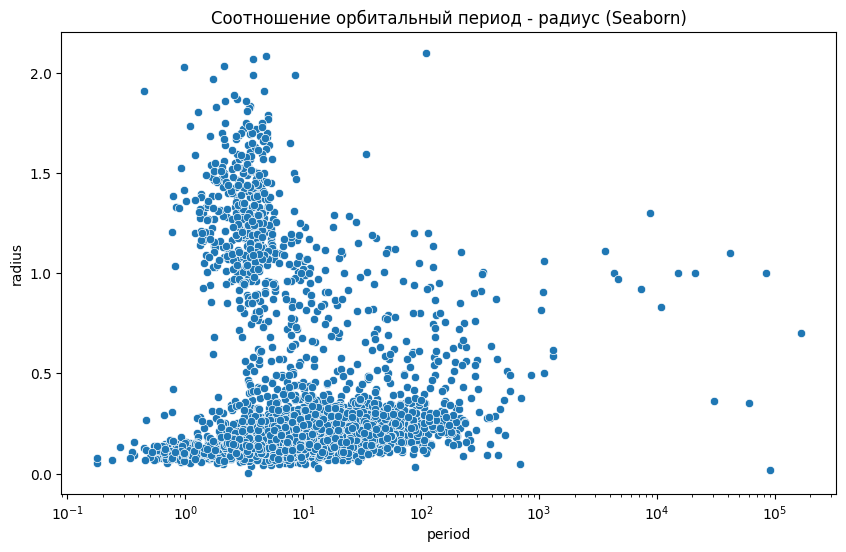

In [46]:
# Используем тот же самый exoplanets_df

fig, ax = plt.subplots(figsize=(10, 6))

# При использовании sns.scatterplot нужно указать конкретный датафрейм, названия колонок для x и y и подграфик
sns.scatterplot(data=exoplanets_df, x='period', y='radius', ax=ax)

# По умолчанию, подписи есть названия соответствующих колонок
# уберите комментарии из двух нижних строк, чтобы добавить более понятные подписи
# ax.set_xlabel(r"Орбитальный период, $\itсутки$")
# ax.set_ylabel("Радиус, $R_J$")
ax.set_title("Соотношение орбитальный период - радиус (Seaborn)")
ax.set_xscale('log') # Логарифмическая шкала показывает гораздо больше, чем линейная, будем использовать её

plt.show()

**Пример 9:** Диаграмма рассеивания в Seaborn для экзопланет (с `hue` по типу)

Аргумент `hue` есть цветовая ось, согласно которой можно раскрасить точки по колонке с категориями. Цвета и нужная легенда задаются автоматически

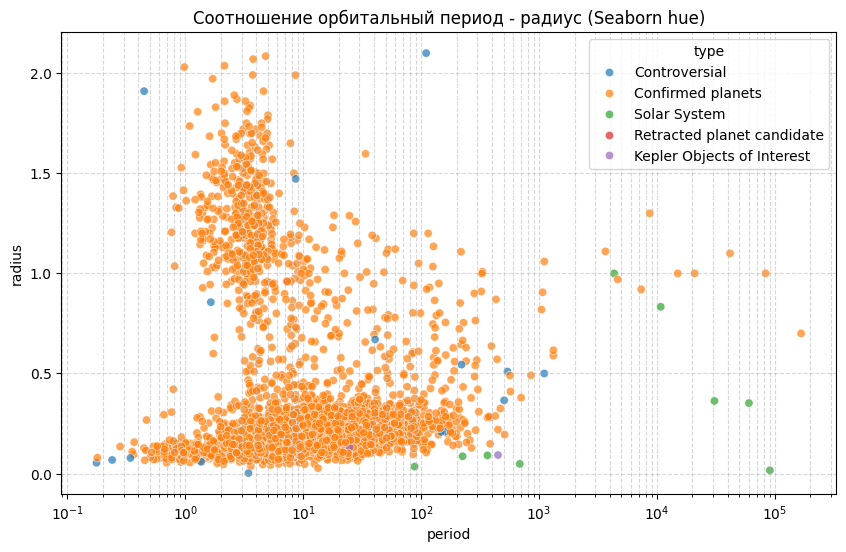

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))

# Передаем колонку 'type' в hue
sns.scatterplot(data=exoplanets_df, x='period', y='radius',
                hue='type',
                ax=ax, alpha=0.7)

# ax.set_xlabel(r"Орбитальный период, $\itсутки$")
# ax.set_ylabel("Радиус, $R_J$")
ax.set_title("Соотношение орбитальный период - радиус (Seaborn hue)")
# по умолчанию заголовок легенды - название колонки hue, чтобы видоизменить его, воспользуемся методами Matplotlib
# ax.legend(title="Тип планеты")
ax.set_xscale('log')
ax.grid(True, which='both', linestyle='--', alpha=0.5)

plt.show()

### Гистограммы в Seaborn

**Метод:** `sns.histplot(data=данные_или_список, bins=..., ax=...)` или `sns.histplot(data=dataframe, x='column_name', bins=..., ax=...)`

`histplot` в Seaborn почти повторяет функционал Matplotlib с некоторыми особенностями.

**Пример 10:** Гистограмма Seaborn - распределение галактик по красному смещению

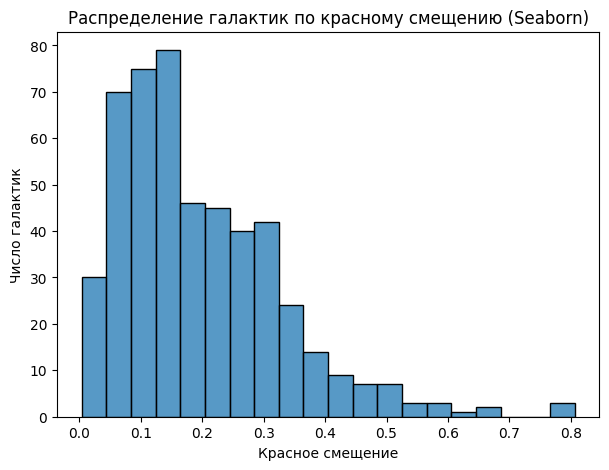

In [54]:
# тот же самый массив galaxy_redshifts

fig, ax = plt.subplots(figsize=(7, 5))

# sns.histplot может принимать массив NumPy или списки как есть
sns.histplot(galaxy_redshifts, bins=20, ax=ax)

ax.set_xlabel("Красное смещение")
ax.set_ylabel("Число галактик")
ax.set_title("Распределение галактик по красному смещению (Seaborn)")

plt.show()

### Столбчатые диаграммы в Seaborn

**Method:** `sns.barplot(x=названия_категорий, y=значения_категорий, ax=...)` или `sns.countplot(data=dataframe, x='category_column', ax=...)`

В Seaborn есть `barplot`, аналогичный функционалу Matplotlib, но ещё есть `countplot` - он позволяет автоматически посчитать значения каждой уникальной категории, встречающейся в колонке. Зачастую это проще.

**Пример 11:** Столбчатая диаграмма Seaborn - разные объекты

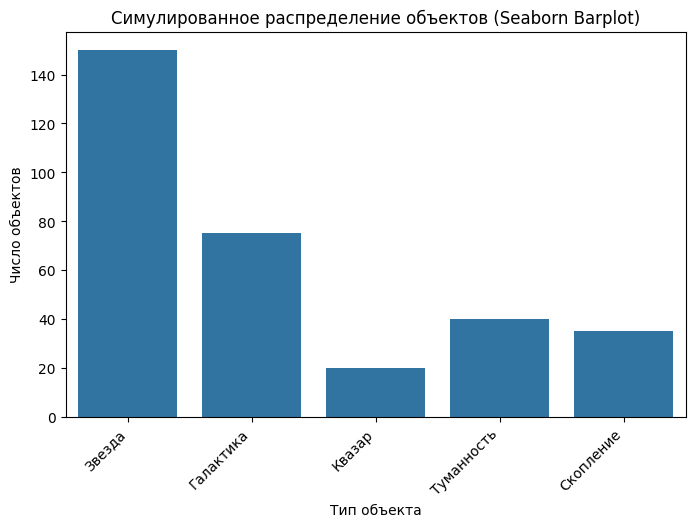

In [59]:
# используем симулированные object_types и object_counts

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x=object_types, y=object_counts, ax=ax)

ax.set_xlabel("Тип объекта")
ax.set_ylabel("Число объектов")
ax.set_title("Симулированное распределение объектов (Seaborn Barplot)")

plt.xticks(rotation=45, ha='right') # Повернем подписи
plt.tight_layout() # "компактифицируем" график автоматически

plt.show()

**Пример 12:** Автоматическая столбчатая диаграмма в Seaborn  - число экзопланет каждой категории

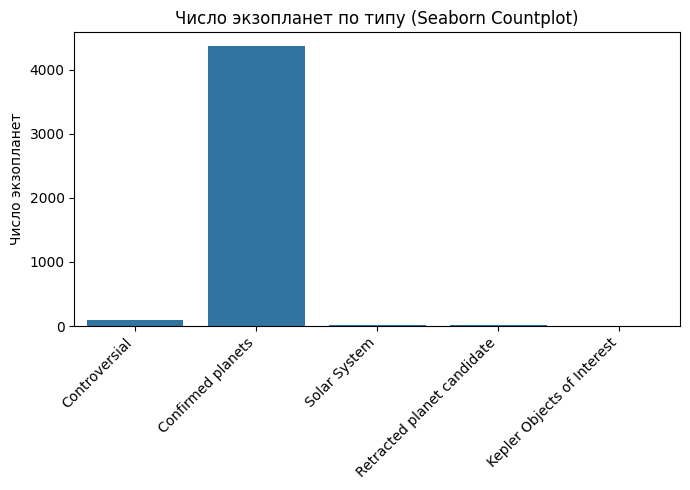

In [3]:
fig, ax = plt.subplots(figsize=(7, 5))

# Используем sns.countplot, задавая датафрейм и название колонки с категориями
sns.countplot(data=exoplanets_df, x='type', ax=ax)

ax.set_xlabel("") # тут подпись будет лишней на мой вкус
ax.set_ylabel("Число экзопланет")
ax.set_title("Число экзопланет по типу (Seaborn Countplot)")


# ax.set_yscale('log') # сделаем ось количеств в логарифмической шкале, так как подтвержденных экзопланет сильно больше
plt.xticks(rotation=45, ha='right') # Повернем подписи
plt.tight_layout() # "компактифицируем" график автоматически

plt.show()

**Пример 13:** данные Gaia и диаграмма рассеяния с цветовой индикацией звездной величины (`colorbar`):

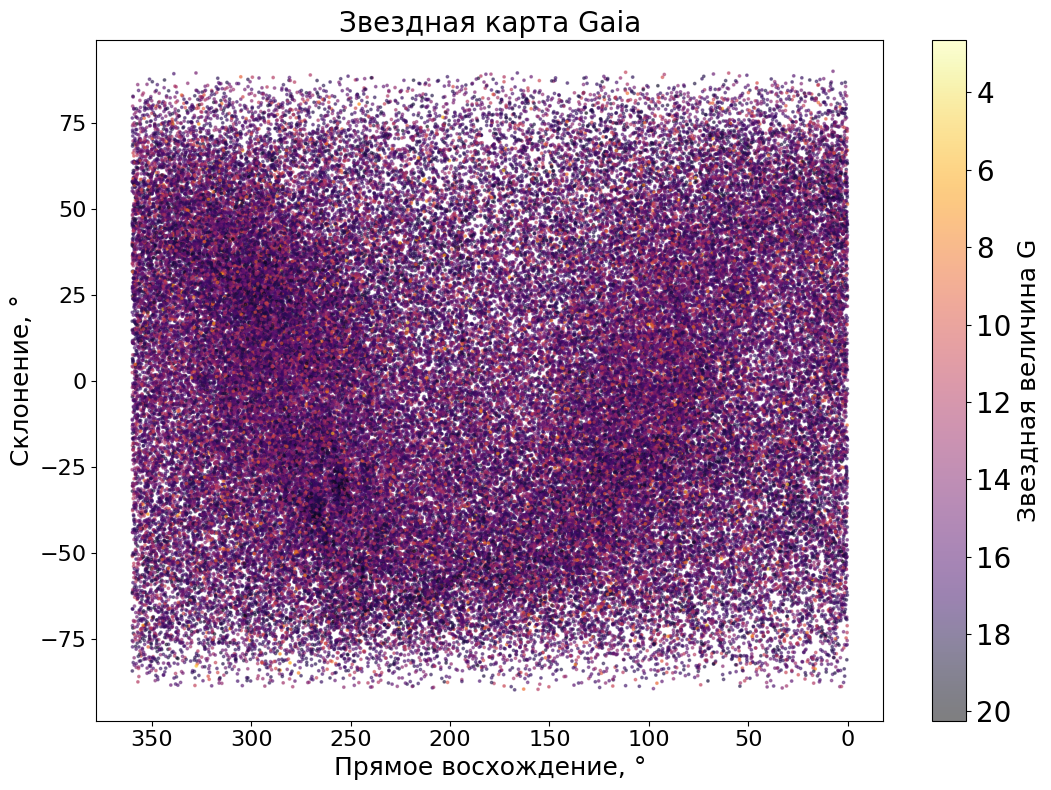

In [5]:
# тут фрагмент данных Gaia с 10⁵ ближайших звезд -- экваториальные координаты в десятичных градусах, собственные движения в миллисекундах дуги в год,
# параллаксы в миллисекундах дуги

gaia_df = pd.read_csv('data/gaia.csv')

fig, ax = plt.subplots(figsize=(11, 8))
sc = ax.scatter(gaia_df['ra'], gaia_df['dec'], c=gaia_df['phot_g_mean_mag'], cmap='inferno_r', s=3, alpha=0.5)
# cmap -- цветовая палитра, приписка _r задает инверсию, чтобы ярким цветом обозначались меньшие звездные величины
ax.set_xlabel('Прямое восхождение, °', fontsize=18)
ax.set_ylabel('Склонение, °', fontsize=18)
ax.set_title('Звездная карта Gaia', fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.invert_xaxis()

cbar = plt.colorbar(sc) # colorbar принимает в качестве аргумента конкретный объект-график 
cbar.set_label('Звездная величина G', fontsize=18)
cbar.ax.invert_yaxis() #инверсию отражаем и на цветовой легенде
cbar.ax.tick_params(labelsize=20) 
plt.tight_layout()
plt.show()

## Упражнения

1. Опираясь на созданный в начале массив `star_masses`, создайте массив `star_luminosities_2`, изменив показатель степени с 3.5 на 4.

2. На одном подграфике продемонстрируйте соотношение "масса-светимость" для двух показателей степени с помощью Seaborn (`sns.scatterplot`), используя массивы `star_masses`, `star_luminosities` и `star_luminosities_2`. Два разных графика обозначьте разными цветами, создайте легенду с соответствующими показателям степени обозначениями, задайте осмысленные подписи к осям. Включите логарифмический масштаб по оси светимостей для лучшего отделения одного графика от другого.
   
3. Используя колонку 'list' из датафрейма `exoplanets_df`, создайте в датафрейме колонку 'homestar_binarity_type', обозначающую категорию двойственности материнской звезды у экзопланеты. В ней для каждой экзопланеты запишите 'Binary, P-type', 'Binary, S-type' или 'Single' в зависимости от значения в колонке 'list'.

4. Покажите распределение экзопланет по двойственности материнской звезды с помощью `sns.countplot()`. Сделайте столбики горизонтальными, включите логарифмический масштаб по числовой оси, а также задайте осмысленные подписи к осям и заголовок. 

5. На одном изображении сделайте две гистограммы (создать два подграфика можно так: `fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))`). Указав опцию `sharey=True` у метода `plt.subplots()` сделайте ось Y общей. Включите логарифмический масштаб на обоих графиках по обоим осям. На `ax1` изобразите гистограмму распределения экзопланет из `exoplanets_df` по массе в массах Юпитера, на `ax2` изобразите гистограмму распределения экзопланет по периодам в сутках. Используйте `sns.histplot()`. Добавьте заголовки и подписи к обоим графикам, а также "компактифицируйте" график, вызвав `plt.tight_layout()` до `plt.show()`.

6. Сколько мод (явно выделяющихся локальных максимумов) вы видите на гистограмме для масс экзопланет? Почему их столько?

7. Изобразите гистограмму звезд из `gaia_df` по звездной величине `phot_g_mean_mag`. Число бинов сделайте равным 20. Подпишите оси графика. Что может сказать это распределение про наблюдательные ограничения миссии Gaia?

8. С помощью выражения ниже подсчитайте тангенциальные скорости звезд в км/с и изобразите их на гистограмме:  
$$ v_t \, (\text{km/s}) = 4.744 \cdot \frac{\sqrt{\mu_\alpha^2 + \mu_\delta^2}}{\varpi},$$
где $\varpi$ - параллакс, $\mu_\alpha$ и $\mu_\delta$ - собственные движения по прямому восхождению и по склонению.  


**Дополнительные материалы**
Тип графиков, представленный в этом ноутбуке - неполная демонстрация возможностей. Изучите примеры на официальных сайтах Matplotlib и Seaborn:

* Официальная галерея примеров Matplotlib: <https://matplotlib.org/stable/gallery/>

<div style="text-align: center;">
  <img src="https://docs-us.oss-us-west-1.aliyuncs.com/images/py-dataviz-lib/seaborn.png" width="800"/>
</div>

* Официальная галерея примеров Seaborn: <https://seaborn.pydata.org/examples/index.html>

Также, в качестве оффлайн-шпаргалок вам предлагаются PDF-документы с основными инструкциями к Matplotlib `cheatsheets_matplotlib.pdf`, `handouts_matplotlib.pdf` и Seaborn `cheatsheets_seaborn.pdf`.